In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# Get constants
with open("params_train.json", 'r') as file:
    params = json.load(file)

agent_name      = params['training']['AGENT_NAME']
model_name      = params['training']['MODEL_NAME']
training_rounds = params['training']['TRAINING_ROUNDS']
scenario        = params['training']['SCENARIO']
old_model       = params['training']['START_TRAINING_WITH']

alpha  = params['Q-update']['ALPHA']
gamma  = params['Q-update']['GAMMA']
mode   = params['Q-update']['MODE']
n_step = params['Q-update']['N']


# Print training trivia
train_str = f"Trained 'agent_{agent_name}_{model_name}' in '{scenario}' for {training_rounds} rounds "
if old_model == "RESET":
    train_str += f"from scratch."
else:
    train_str += f"starting with '{old_model}'."
print(train_str)
print(f"Performed Q-update in {n_step}-step {mode} mode.  (alpha = {alpha}, gamma = {gamma})")

Trained 'agent_h6_BombCoin-Miner-1' in 'classic' for 5000 rounds starting with 'coin-miner1'.
Performed Q-update in 5-step SARSA mode.  (alpha = 0.1, gamma = 1)


In [3]:
# All possible features
all_direction_features = np.array(
    [
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 1, 1],
        [1, 1, 1, 1],
        [0, 0, 0, 2],
        [0, 0, 1, 2],
        [0, 1, 1, 2],
        [1, 1, 1, 2],
        [0, 0, 2, 2],
        [0, 1, 2, 2],
        [1, 1, 2, 2],
        [0, 2, 2, 2],
        [1, 2, 2, 2],
        [2, 2, 2, 2],   
    ]
)
all_own_spot_features  = np.array([0, 1, 2])
# all_mode_features      = np.array([0, 1, 2])  

### Evaluating the trained model

In [4]:
trained_model = np.load(f"model_{agent_name}_{model_name}.npy")
Sa_counter    = np.load(f"sa_counter_{agent_name}_{model_name}.npy")
policy        = np.argmax(trained_model, axis = -1)

In [5]:
def look_up_q_tensor(f5 = 1):
    print(f"Q-Tensor for case (f5 = {f5}):")
    print(f"state  direction features   policy  trained model  {'':20}number of encounters")
    for i in range(len(all_direction_features)):
        line = f"{i:2}{'':2}{all_direction_features[i]} {[f5]}{'':2}{policy[i, f5]}{'':2}["
        for Q_value in trained_model[i, f5]:
            line += f"{Q_value:-7.1f}"
        line += f"]  {np.sum(Sa_counter[i, f5]):5} ["
        for count in Sa_counter[i, f5]:
            line += f" {count:5}"
        line += f"]"
        print(line)

In [6]:
look_up_q_tensor(f5 = 0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [   48.2   29.3   43.2   46.7  158.2   51.5]   9285 [   204   155   218   193  8353   162]
 1  [0 0 0 1] [0]  3  [   99.2   71.1   83.4  164.3  100.6  104.5]  17764 [    96    85    75 17319    95    94]
 2  [0 0 1 1] [0]  2  [   25.9   16.9  163.6   89.3   26.2   51.0]  10318 [    16    31 10192    23    27    29]
 3  [0 1 1 1] [0]  2  [   78.6   59.0  157.3   95.8   63.3   77.6]   6704 [    16    13  6615    24    19    17]
 4  [1 1 1 1] [0]  4  [    0.0    0.0    0.0    0.0  127.8    0.0]     43 [     0     0     0     0    43     0]
 5  [0 0 0 2] [0]  3  [  100.7  100.4   78.3  161.4  109.0  100.1]  33255 [   189   167   181 32282   235   201]
 6  [0 0 1 2] [0]  2  [   29.6   14.9  160.1   67.9   40.8   59.1]  11108 [    40    39  8958  1983    45    43]
 7  [0 1 1 2] [0]  3  [   12.1   34.2    9.7  159.0   12.8    3.9]   1530 [     7     7  

In [7]:
look_up_q_tensor(f5 = 1)

Q-Tensor for case (f5 = 1):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [1]  4  [   72.2   86.8   70.8   81.1  161.9   91.3]  10977 [    53   132    62    68 10601    61]
 1  [0 0 0 1] [1]  3  [  113.8   83.5  114.0  161.1  118.9  127.6]  32168 [   132   120   109 26919  4575   313]
 2  [0 0 1 1] [1]  3  [  110.8  115.1  105.2  158.4  117.2  113.4]  21486 [    59    62    54 21178    68    65]
 3  [0 1 1 1] [1]  5  [  100.4  103.3  101.2  105.6  115.7  156.7]  17577 [    38    46    45    41    46 17361]
 4  [1 1 1 1] [1]  3  [   78.8   73.5   73.9  156.2   64.3   66.5]   7404 [    16    18    15  7327    12    16]
 5  [0 0 0 2] [1]  3  [  143.2  143.2  133.6  162.0  145.6  144.3]  208616 [  3927  3032  3501 152482 41945  3729]
 6  [0 0 1 2] [1]  3  [  149.7  147.8  151.0  161.8  152.3  149.0]  490261 [ 13279  9102 90226 276262 98145  3247]
 7  [0 1 1 2] [1]  3  [  136.0  137.1  136.5  162.4  136.2  136.2]  105055 [  1158  6

In [8]:
look_up_q_tensor(f5 = 2)

Q-Tensor for case (f5 = 2):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [2]  4  [   50.4   67.9   62.7   65.5  161.0   96.2]   7163 [    43    58    42    58  6900    62]
 1  [0 0 0 1] [2]  5  [  129.6  104.7  119.7  113.6  115.9  163.5]  66731 [  2606  1573  1184 15508 10543 35317]
 2  [0 0 1 1] [2]  5  [  133.6  131.5  133.8  139.9  133.3  162.1]  120486 [   984   800 36687 33883 33228 14904]
 3  [0 1 1 1] [2]  5  [  101.0  106.5  110.7  117.2  115.0  161.2]  28919 [   504  3512  1631   345  1884 21043]
 4  [1 1 1 1] [2]  5  [   44.4   63.6   74.6   73.0   80.0  161.7]   5156 [    15    67    20    17    18  5019]
 5  [0 0 0 2] [2]  5  [    1.1   -0.4    6.6   -0.4   10.7  148.0]    265 [     2     1     2     1     2   257]
 6  [0 0 1 2] [2]  5  [    5.3    5.2    0.0    0.0    0.5  143.6]    170 [     1     1     0     0     2   166]
 7  [0 1 1 2] [2]  5  [    0.0    1.3    4.6    0.0    0.0  139.4]     76 [     0     1 

## Looking at the training process

### Training performance over rounds

In [9]:
def moving_average (x, w):
    """
    from https://newbedev.com/how-to-calculate-rolling-moving-average-using-numpy-scipy
    """
    return np.convolve(x, np.ones(w), 'valid') / w

In [10]:
with open("results_train.json", 'r') as file:
    training_results = json.load(file)

In [11]:
number_of_rounds = training_results['by_agent'][f"agent_{agent_name}"]['rounds']
round_list       = list(training_results['by_round'])
rounds           = np.arange(number_of_rounds) + 1
collected_coins  = np.zeros(number_of_rounds, dtype = int)
round_lengths    = np.zeros(number_of_rounds, dtype = int)
kills            = np.zeros(number_of_rounds, dtype = int)
suicides         = np.zeros(number_of_rounds, dtype = int)
died             = np.zeros(number_of_rounds, dtype = int)
invalid_moves    = np.zeros(number_of_rounds, dtype = int)

for round_name in round_list:
    round_dict             = training_results['by_round'][round_name]
    round                  = round_dict['round'] - 1   # round index
    collected_coins[round] = round_dict['coins'][0]
    round_lengths[round]   = round_dict['steps']
    kills[round]           = round_dict['kills'][0]
    suicides[round]        = round_dict['suicides'][0]
    died[round]            = round_dict['got killed'][0]
    invalid_moves[round]   = round_dict['invalid'][0]


In [12]:
survived        = 1 - died
was_killed      = died - suicides
steps_survived  = np.where(died, round_lengths, 400)

In [13]:
avg_length   = 50   # number of rounds to average over

kill_rate           = moving_average(kills, avg_length)
suicide_rate        = moving_average(suicides, avg_length)
was_killed_rate     = moving_average(was_killed, avg_length)
died_rate           = moving_average(died, avg_length)
steps_survived_rate = moving_average(steps_survived, avg_length)


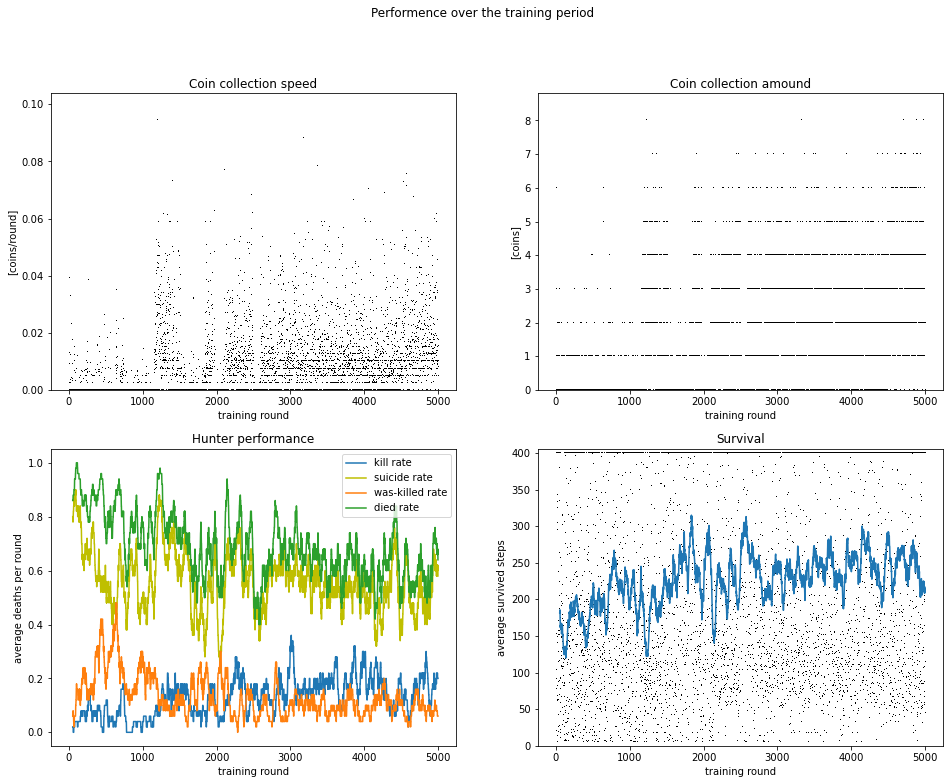

In [14]:
plt.figure(figsize = (16,12))
plt.suptitle("Performence over the training period")

plt.subplot(2, 2, 1)
speed = collected_coins / round_lengths
plt.plot(rounds, speed, ',k')
plt.ylim((0, 1.1*max(speed)))
plt.title("Coin collection speed")
plt.ylabel("[coins/round]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 2)
plt.plot(rounds, collected_coins, ',k')
plt.ylim((0, 1.1*max(collected_coins)))
plt.title("Coin collection amound")
plt.ylabel("[coins]")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.subplot(2, 2, 3)
plt.plot(rounds[avg_length-1:], kill_rate, label = "kill rate")
plt.plot(rounds[avg_length-1:], suicide_rate, 'y', label = "suicide rate")
plt.plot(rounds[avg_length-1:], was_killed_rate, label = "was-killed rate")
plt.plot(rounds[avg_length-1:], died_rate, label = "died rate")
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Hunter performance")
plt.ylabel("average deaths per round")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(rounds, steps_survived, ',k')
plt.plot(rounds[avg_length-1:], steps_survived_rate)
plt.ylim(0, 405)
plt.xlim(-0.05*number_of_rounds, 1.05*number_of_rounds)
plt.title("Survival")
plt.ylabel("average survived steps")   # speed of 0.4 would be considerad great performance
plt.xlabel("training round")

plt.show()



In [19]:
def analyze_action():
    title_str = "Evolution of actions"
    
    Q_action = np.mean(allQs, axis = (1,2))
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(number_of_rounds / 50) + 1, Q_action, label = labels)
    plt.title(title_str)
    plt.ylabel("Mean Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

In [20]:
def analyze_state (state):
    state_index, f5 = state
    Q_state = allQs[:, state_index, f5]
    labels  = ["action 0", "action 1", "action 2", "action 3", "WAIT", "BOMB"]

    plt.plot(np.arange(training_rounds / 50) + 1, Q_state, label = labels)
    plt.title(f"Evolution of policies in state {state}")
    plt.ylabel("Q-value")
    plt.xlabel("training round")
    plt.legend()
    plt.show()

### Evolution of the Q-model

In [17]:
allQs = np.load("Qtrain.npy")

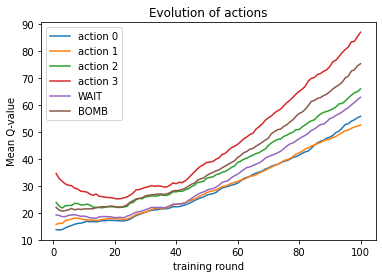

In [21]:
analyze_action()

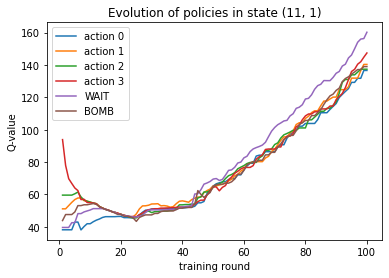

In [24]:
analyze_state((11, 1))

In [23]:
look_up_q_tensor(0)

Q-Tensor for case (f5 = 0):
state  direction features   policy  trained model                      number of encounters
 0  [0 0 0 0] [0]  4  [   48.2   29.3   43.2   46.7  158.2   51.5]   9285 [   204   155   218   193  8353   162]
 1  [0 0 0 1] [0]  3  [   99.2   71.1   83.4  164.3  100.6  104.5]  17764 [    96    85    75 17319    95    94]
 2  [0 0 1 1] [0]  2  [   25.9   16.9  163.6   89.3   26.2   51.0]  10318 [    16    31 10192    23    27    29]
 3  [0 1 1 1] [0]  2  [   78.6   59.0  157.3   95.8   63.3   77.6]   6704 [    16    13  6615    24    19    17]
 4  [1 1 1 1] [0]  4  [    0.0    0.0    0.0    0.0  127.8    0.0]     43 [     0     0     0     0    43     0]
 5  [0 0 0 2] [0]  3  [  100.7  100.4   78.3  161.4  109.0  100.1]  33255 [   189   167   181 32282   235   201]
 6  [0 0 1 2] [0]  2  [   29.6   14.9  160.1   67.9   40.8   59.1]  11108 [    40    39  8958  1983    45    43]
 7  [0 1 1 2] [0]  3  [   12.1   34.2    9.7  159.0   12.8    3.9]   1530 [     7     7  